<a href="https://colab.research.google.com/github/Nagarjun-CS/Customer-Acquisition-and-Revnue-Analysis/blob/main/Customer_Acquisition_and_Revenue_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In July 2024, I embarked on a project to develop a Customer Acquisition and Revenue Analytics Dashboard aimed at gaining deep insights into customer behavior, product adoption trends, and revenue generation. The purpose of this project was to explore and understand the key factors driving customer acquisition and how various demographics and behaviors influence product purchases. By analyzing these trends, the dashboard would provide actionable insights to optimize sales strategies and improve revenue performance.

# **Ideology**
The ideology behind this project was rooted in the belief that a data-driven approach can significantly enhance decision-making, especially when it comes to customer behavior and revenue generation. With data on customer demographics, product preferences, and purchasing behaviors, I intended to uncover patterns that would guide future marketing and sales strategies. By combining customer insights with revenue analysis, the dashboard aimed to highlight key revenue contributors and optimize acquisition efforts.

# **Approach**
For this project, I followed a multi-step approach, utilizing various tools for data aggregation, cleaning, and visualization. I used Excel for initial data aggregation, gathering customer and revenue data to ensure a solid foundation for the analysis. The next step involved Python for data cleaning, ensuring that the dataset was free from inconsistencies and ready for analysis. Finally, I used Tableau to create interactive and informative visualizations, allowing for a clear presentation of insights into customer acquisition, purchasing patterns, and product performance. This combination of tools enabled a comprehensive analysis that was both efficient and visually compelling.

# **Goal**
The primary goal of this project was to uncover the most effective strategies for customer acquisition and revenue generation by analyzing customer demographics and product adoption. The focus was on identifying key trends related to customer behavior, including age, occupation, and follow-up interactions, and how these factors influenced product adoption. Additionally, the dashboard aimed to highlight the performance of different products in terms of revenue contribution, helping decision-makers allocate resources effectively to maximize ROI and improve conversion rates.



# **Code**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
Dataset = pd.read_excel("/content/drive/MyDrive/Data Analysis Projects/Travel_promotion_dataset.xlsx")
Dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,marketing_cost,revenue_generated
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,13.0,100.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,17.0,0.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,14.0,100.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,14.5,0.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,14.5,125.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,...,Single,3.0,1,3,1,2.0,Executive,21212.0,25.5,150.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,18.5,175.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,Single,3.0,0,5,0,2.0,Executive,20289.0,18.0,150.0


In [ ]:
MarketingData = Dataset.copy()

In [ ]:
MarketingData.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,marketing_cost,revenue_generated
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,13.0,100.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,17.0,0.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,14.0,100.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,14.5,0.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,14.0,0.0


In [ ]:
MarketingData.keys()

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'marketing_cost', 'revenue_generated'],
      dtype='object')

In [ ]:
MarketingData['Gender'] = MarketingData['Gender'].replace(['Fe Male', 'Female Gender'], 'Female')

In [ ]:
MarketingData.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


**Handling Missing Data:**
Handling missing data is a critical step in data preprocessing to ensure that the analysis and model outcomes are accurate and reliable. There are several methods to handle missing values, and the choice of method depends on the nature of the data and the distribution of missing values. Mean, median, and mode are common imputation techniques used to replace missing data points.

- **Mean Imputation** is used when the data is continuous and normally distributed, as it replaces missing values with the average of the available data. However, it should be avoided if there are significant outliers, as they can skew the mean and lead to inaccurate imputation.

- **Median Imputation** is preferred when the data is skewed or contains outliers. The median, being the middle value, is less affected by extreme values, making it a robust option for imputation in non-normal distributions.

- **Mode Imputation** is used for categorical data or discrete variables. The mode, which represents the most frequent value in the dataset, is ideal for handling missing values in features like gender, product type, or other categorical fields where replacing with the most common category maintains the dataset’s integrity.

In this project, I carefully assessed the data before selecting the appropriate method. Continuous variables with a normal distribution were imputed using the mean, while skewed data were handled with the median. For categorical variables, I used mode imputation to preserve the most frequent category, ensuring minimal disruption to the dataset's overall structure.

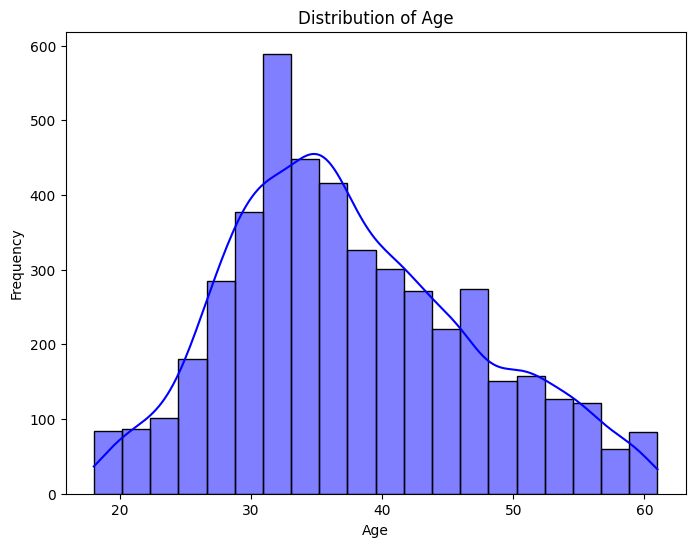

In [ ]:
# Plot histogram for the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['Age'], bins=20, kde=True, color='blue')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Fill missing values in the 'Age' column with the median
MarketingData['Age'].fillna(MarketingData['Age'].median(), inplace=True)

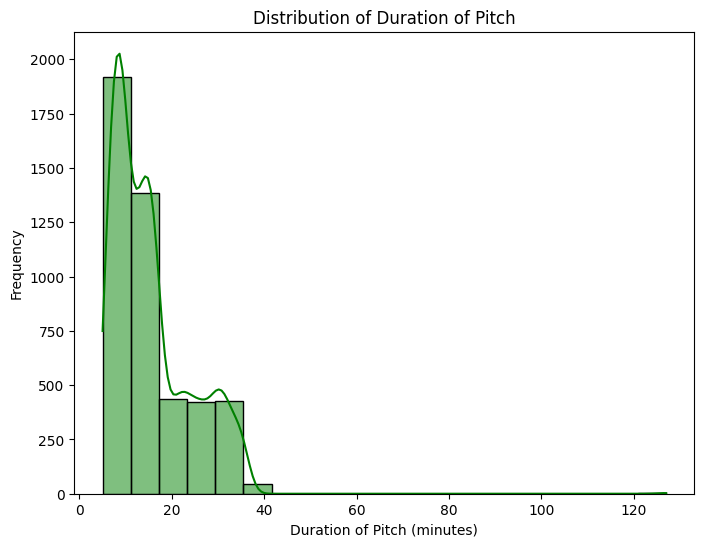

In [ ]:
# Plot histogram for the 'DurationOfPitch' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['DurationOfPitch'], bins=20, kde=True, color='green')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Duration of Pitch')
plt.xlabel('Duration of Pitch (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'DurationOfPitch' column with the median
MarketingData['DurationOfPitch'].fillna(MarketingData['DurationOfPitch'].median(), inplace=True)


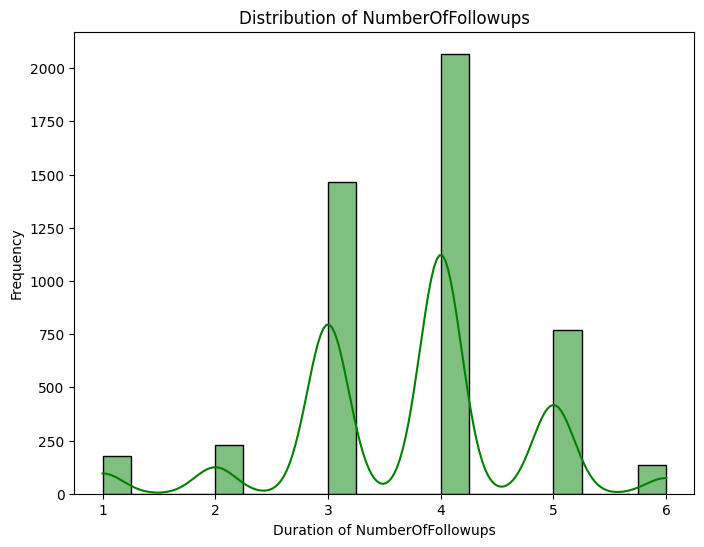

In [ ]:
# Plot histogram for the 'DurationOfPitch' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['NumberOfFollowups'], bins=20, kde=True, color='green')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of NumberOfFollowups')
plt.xlabel('Duration of NumberOfFollowups')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'NumberOfFollowups' column with the mode
MarketingData['NumberOfFollowups'].fillna(MarketingData['NumberOfFollowups'].mode()[0], inplace=True)

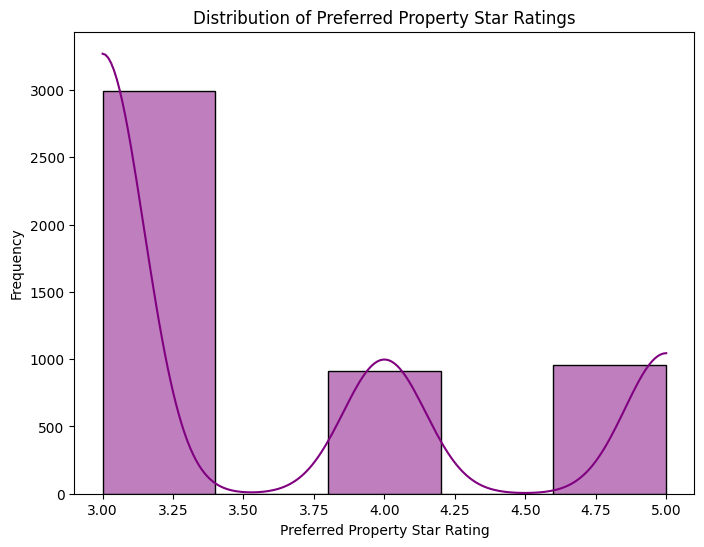

In [ ]:
# Plot histogram for the 'PreferredPropertyStar' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['PreferredPropertyStar'], bins=5, kde=True, color='purple')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Preferred Property Star Ratings')
plt.xlabel('Preferred Property Star Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'PreferredPropertyStar' column with the mode
MarketingData['PreferredPropertyStar'].fillna(MarketingData['PreferredPropertyStar'].mode()[0], inplace=True)

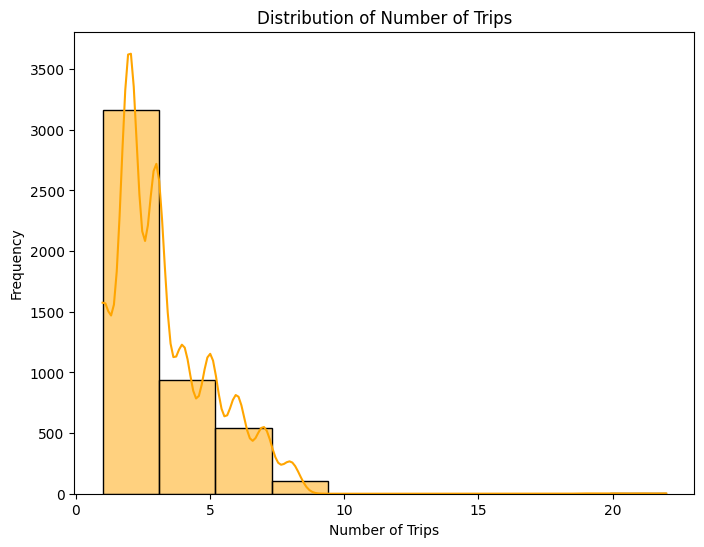

In [ ]:
# Plot histogram for the 'NumberOfTrips' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['NumberOfTrips'], bins=10, kde=True, color='orange')
plt.title('Distribution of Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'NumberOfTrips' column with the mode
MarketingData['NumberOfTrips'].fillna(MarketingData['NumberOfTrips'].mode()[0], inplace=True)

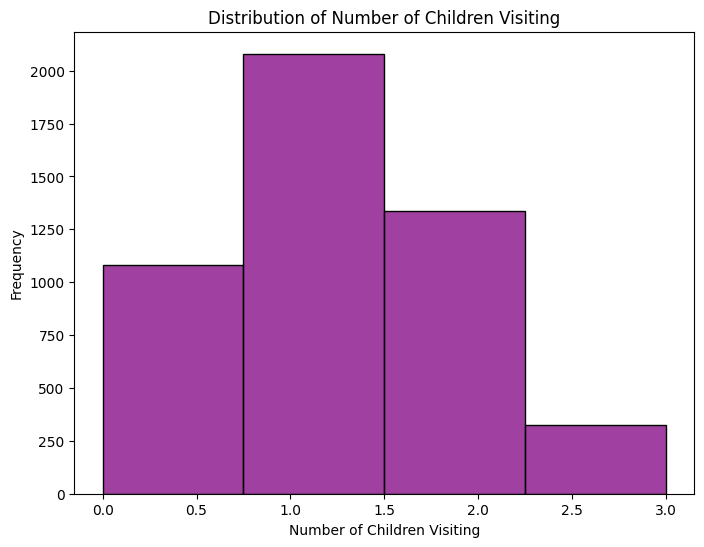

In [ ]:
# Plot histogram for the 'NumberOfChildrenVisiting' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['NumberOfChildrenVisiting'], bins=4, kde=False, color='purple')
plt.title('Distribution of Number of Children Visiting')
plt.xlabel('Number of Children Visiting')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'NumberOfChildrenVisiting' column with the mode
MarketingData['NumberOfChildrenVisiting'].fillna(MarketingData['NumberOfChildrenVisiting'].mode()[0], inplace=True)

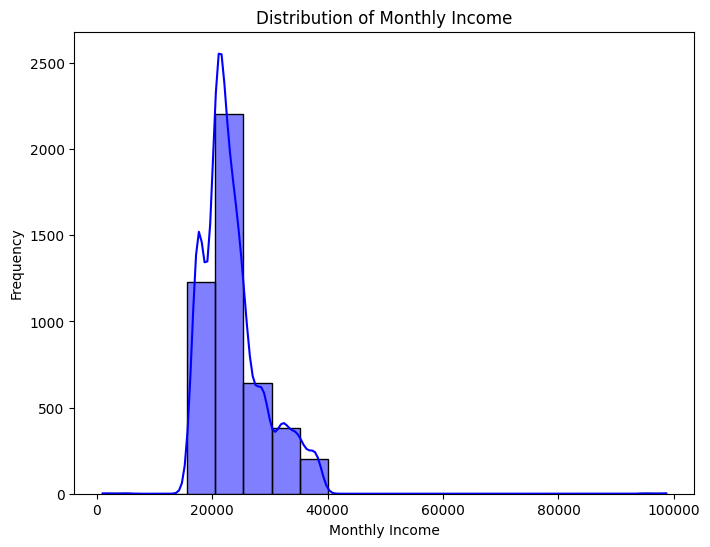

In [ ]:
# Plot histogram for the 'MonthlyIncome' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['MonthlyIncome'], bins=20, kde=True, color='blue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'MonthlyIncome' column with the median
MarketingData['MonthlyIncome'].fillna(MarketingData['MonthlyIncome'].median(), inplace=True)

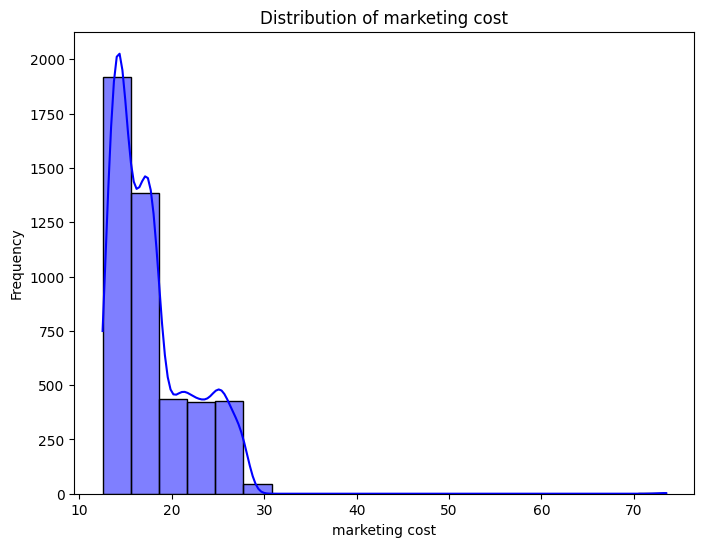

In [ ]:
# Plot histogram for the 'MonthlyIncome' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['marketing_cost'], bins=20, kde=True, color='blue')
plt.title('Distribution of marketing cost')
plt.xlabel('marketing cost')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'marketing_cost' column with the median
MarketingData['marketing_cost'].fillna(MarketingData['marketing_cost'].median(), inplace=True)

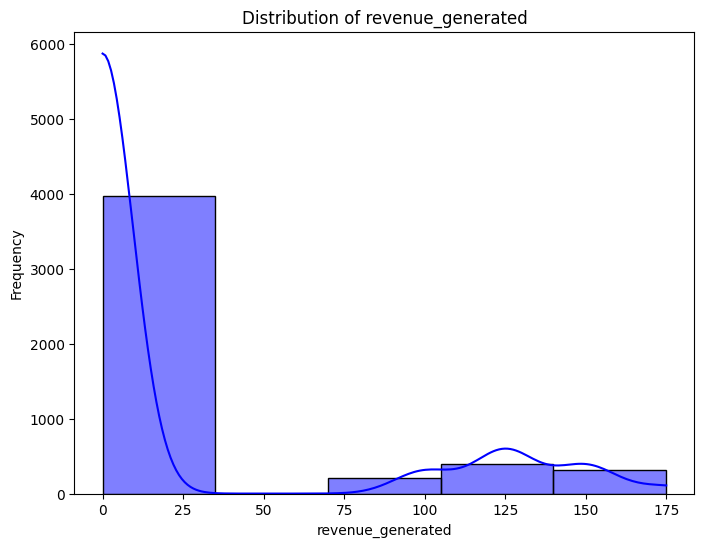

In [ ]:
# Plot histogram for the 'MonthlyIncome' column
plt.figure(figsize=(8, 6))
sns.histplot(MarketingData['revenue_generated'], bins=5, kde=True, color='blue')
plt.title('Distribution of revenue_generated')
plt.xlabel('revenue_generated')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing values in the 'revenue_generated' column with the median
MarketingData['revenue_generated'].fillna(MarketingData['revenue_generated'].median(), inplace=True)

In [ ]:
# Fill missing values in the 'revenue_generated' column with the median
MarketingData['TypeofContact'].fillna(MarketingData['TypeofContact'].mode()[0], inplace=True)

In [ ]:
MarketingData.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [ ]:
MarketingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [ ]:
MarketingData.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,marketing_cost,revenue_generated
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.362930,2.905074,3.711129,3.577946,3.201105,0.290917,3.078151,0.620295,1.184738,23559.179419,17.681465,24.283961
std,1411.188388,0.390925,9.104795,0.916583,8.316166,0.724891,0.998271,0.797005,1.833979,0.454232,1.365792,0.485363,0.852323,5257.862921,4.158083,51.529192
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,12.500000,0.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000,14.500000,0.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000,16.500000,0.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000,19.500000,0.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,73.500000,175.000000


# **Exploratory Data Analysis (EDA)**

<ipython-input-31-3144aca9b746>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="viridis")


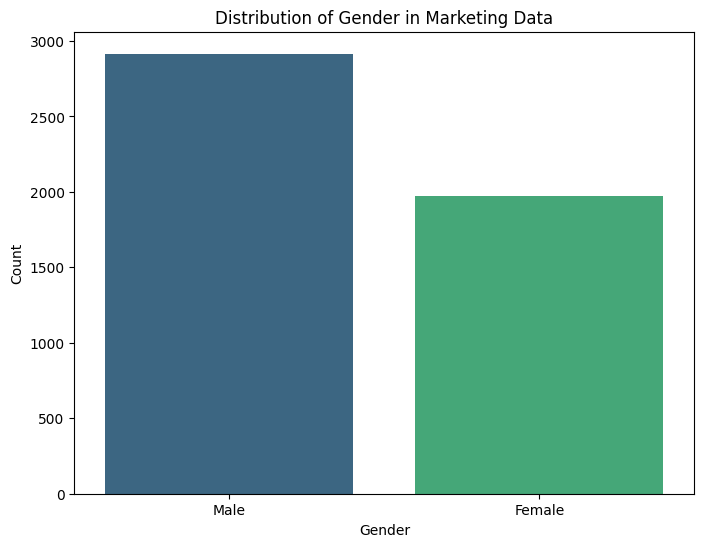

In [ ]:
# Count the number of males and females
gender_distribution = MarketingData['Gender'].value_counts()

# Plot bar graph for the distribution of Male and Female
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="viridis")
plt.title('Distribution of Gender in Marketing Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Insights:**

The graph shows that **Male customers** outnumber **Female customers** in the dataset. This suggests that the product or marketing appeals more to men, but there is potential to target female customers more effectively. Tailored marketing strategies could help balance the gender distribution and boost product adoption among female customers.


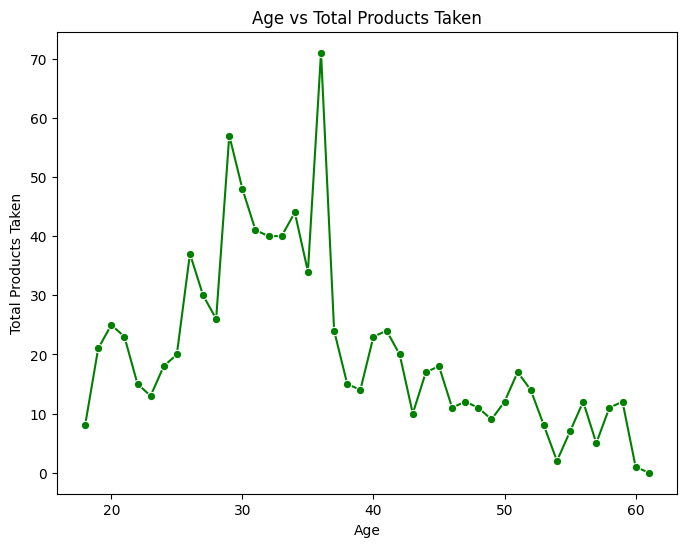

In [ ]:
# Group data by 'Age' and calculate the total products taken for each age
age_product_total = MarketingData.groupby('Age')['ProdTaken'].sum().reset_index()

# Plot the line graph for Age vs total products taken
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='ProdTaken', data=age_product_total, marker="o", color="green")
plt.title('Age vs Total Products Taken')
plt.xlabel('Age')
plt.ylabel('Total Products Taken')
plt.show()


**Insights from Age vs Total Products Taken Graph:**

- **Peak Product Adoption (Age 30-40)**: The highest number of products are taken by customers aged between 30 and 40, making them the most active buyers.
- **Decline After Age 40**: Product adoption decreases significantly after age 40, suggesting that older customers may require different marketing strategies.
- **Moderate Adoption in Younger Age Groups**: Younger customers in their early 20s show moderate product adoption, indicating potential for targeted marketing.
- **Opportunity for Older Customers**: There is potential to increase product adoption among older customers by tailoring products and campaigns to their needs.


<ipython-input-33-587f0af77f40>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityTier', y='revenue_generated', data=city_revenue_total, palette='Blues_d')


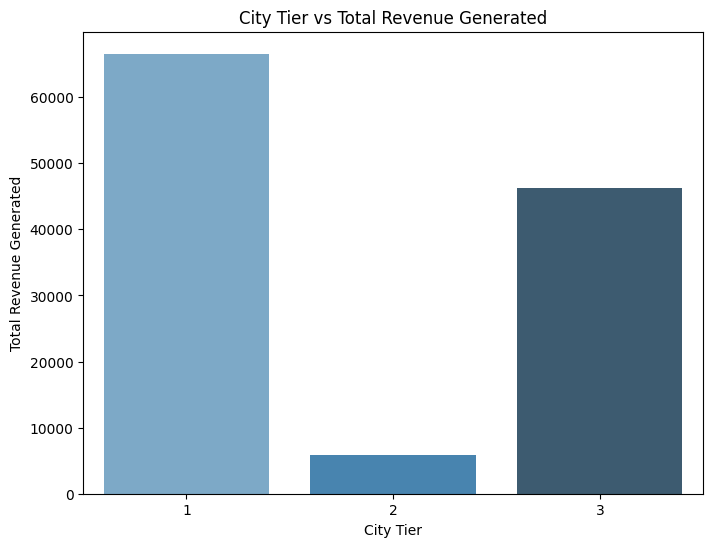

In [ ]:
# Group data by 'CityTier' and calculate the total revenue for each tier
city_revenue_total = MarketingData.groupby('CityTier')['revenue_generated'].sum().reset_index()

# Plot a vertical bar chart for CityTier vs total revenue_generated
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='revenue_generated', data=city_revenue_total, palette='Blues_d')
plt.title('City Tier vs Total Revenue Generated')
plt.xlabel('City Tier')
plt.ylabel('Total Revenue Generated')
plt.show()


**Insights from City Tier vs Total Revenue Generated Graph:**

- **Tier 1 Cities Generate the Most Revenue**: Tier 1 cities contribute the highest revenue, making them the most valuable region for sales and product adoption.
- **Tier 3 Cities Show Moderate Revenue**: Tier 3 cities generate a moderate level of revenue, indicating potential for growth with targeted marketing efforts.
- **Tier 2 Cities Underperform**: Tier 2 cities generate the least revenue, suggesting an opportunity to investigate and improve product adoption and engagement in these regions.


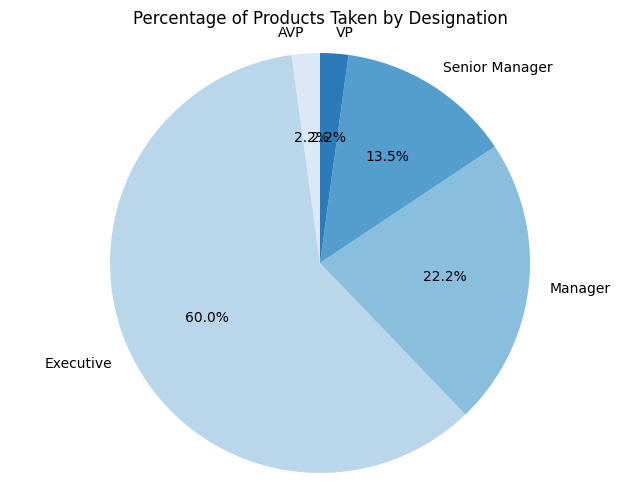

In [ ]:
# Group the data by 'Designation' and calculate the percentage of products taken
designation_prod_taken = MarketingData.groupby('Designation')['ProdTaken'].sum().reset_index()

# Convert the 'ProdTaken' percentage into a percentage format
designation_prod_taken['ProdTaken'] = designation_prod_taken['ProdTaken'] * 100

# Plot the pie chart for the percentage of products taken by designation
plt.figure(figsize=(8, 6))
plt.pie(designation_prod_taken['ProdTaken'], labels=designation_prod_taken['Designation'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))
plt.title('Percentage of Products Taken by Designation')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


**Insights** from Percentage of Products Taken by Designation:

- **Executives Lead in Product Adoption**: Executives account for 60% of total product adoptions, making them the most engaged group.
- **Managers Show Significant Engagement**: Managers contribute 22.2% of product adoptions, indicating strong interest in the product.
- **Low Engagement from Senior Managers and Above**: Senior Managers, VPs, and AVPs collectively account for only 17.7% of adoptions, suggesting that these roles may require different marketing approaches to boost engagement.


## **Marketing Strategy Ideas:**

1. **Focus on Customers Aged 30-40**:
   - The **Age vs Product Taken** graph indicates that customers between the ages of 30-40 are the most likely to adopt products. Tailor marketing campaigns specifically for this demographic with messaging that resonates with their needs and preferences. Consider offering product bundles, loyalty programs, or discounts that appeal to this age group.

2. **Promote the Basic Product More**:
   - The **Product vs Revenue** pie chart shows that the **Basic** product is responsible for more than 60% of the total revenue. Focus marketing efforts on promoting this product further, especially to potential new customers. You could also introduce variations or upgrades to the Basic product to increase its appeal without significantly increasing costs.

3. **Target Freelancers and Salaried Professionals**:
   - The **Occupation vs Revenue** chart highlights that **Freelancers** and **Salaried professionals** contribute the most to revenue generation. Marketing strategies should be designed to appeal to these groups, focusing on how the product fits into their professional lives and enhances productivity or personal growth.

4. **Optimize Sales Pitch Duration**:
   - From the **Pitch Duration vs Product Taken** chart, pitches that last around **10 minutes** yield the highest product adoption. Encourage sales teams to aim for this optimal pitch length in their customer interactions. Training programs and scripts can be designed to ensure sales pitches are concise, engaging, and effective within this time frame.

5. **Maximize Follow-Ups at 4**:
   - The **Follow Up vs Product Taken** chart shows that **4 follow-ups** result in the highest product adoption rates. Marketing and sales teams should focus on maintaining contact with leads up to the fourth follow-up to maximize conversions. Implement automated follow-up emails or calls to ensure consistent engagement with potential customers.

6. **Leverage Targeted Offers for City Tier 1 Customers**:
   - The **City Tier vs Total Revenue Generated** chart shows that **Tier 1** cities generate the most revenue. Consider rolling out exclusive offers, loyalty rewards, or premium packages for customers in Tier 1 cities to further drive sales in this high-revenue segment.

7. **Engage Senior-Level Executives**:
   - Based on the **Percentage of Products Taken by Designation** chart, executives like **Managers** and **Senior Managers** are actively adopting products. Offer personalized product recommendations and premium service packages targeted at higher-level executives to increase engagement in this valuable customer segment.

8. **Highlight ROI and Conversion Rates in Marketing Campaigns**:
   - The overall dashboard indicates a strong **ROI (37.34%)** and a healthy **Conversion Rate (18.82%)**. These metrics should be used in marketing materials to highlight the efficiency of the product. Customers are more likely to trust and engage with a product that demonstrates clear financial benefits and strong conversion performance.

9. **Use Customer Testimonials and Case Studies**:
   - Leverage social proof from **Freelancers**, **Salaried professionals**, and executives who have benefited from the product. Create case studies and testimonials showcasing how your product improved productivity or helped achieve business outcomes. This will help potential customers relate and trust the product’s value.

10. **Experiment with Other Product Offerings**:
   - Since the **Basic** and **Deluxe** products are the top performers, explore the potential of introducing new product tiers or bundling services. Tiering products according to customer needs could help upsell or cross-sell more offerings.

